# Air Quality Index Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
#Define the data as a dictionary
data={'Date':['2024-12-01','2024-12-01','2024-12-01','2024-12-01','2024-12-02','2024-12-02','2024-12-02','2024-12-02'],
     'Time':['08:00','12:00','16:00','20:00','08:00','12:00','16:00','20:00'],
     'Location':['Location A','Location A','Location B','Location B','Location A','Location B','Location A','Location B'],
     'PM2.5':[45.0,50.0,55.0,42.0,48.0,53.0,60.0,47.0],'PM10':[60.0,65.0,70.0,55.0,62.0,68.0,75.0,58.0],
     'Temperature':[15.2,17.8,20.1,18.5,14.5,16.7,19.2,17.0],
     'Wind Speed': [3.5,2.8,3.0,4.1,3.2,2.9,3.8,4.0]}
data=pd.DataFrame(data)
print(data)

         Date   Time    Location  PM2.5  PM10  Temperature  Wind Speed
0  2024-12-01  08:00  Location A   45.0  60.0         15.2         3.5
1  2024-12-01  12:00  Location A   50.0  65.0         17.8         2.8
2  2024-12-01  16:00  Location B   55.0  70.0         20.1         3.0
3  2024-12-01  20:00  Location B   42.0  55.0         18.5         4.1
4  2024-12-02  08:00  Location A   48.0  62.0         14.5         3.2
5  2024-12-02  12:00  Location B   53.0  68.0         16.7         2.9
6  2024-12-02  16:00  Location A   60.0  75.0         19.2         3.8
7  2024-12-02  20:00  Location B   47.0  58.0         17.0         4.0


In [16]:
#Preview the data
print("Data Overview")
print(data.head())

Data Overview
         Date   Time    Location  PM2.5  PM10  Temperature  Wind Speed
0  2024-12-01  08:00  Location A   45.0  60.0         15.2         3.5
1  2024-12-01  12:00  Location A   50.0  65.0         17.8         2.8
2  2024-12-01  16:00  Location B   55.0  70.0         20.1         3.0
3  2024-12-01  20:00  Location B   42.0  55.0         18.5         4.1
4  2024-12-02  08:00  Location A   48.0  62.0         14.5         3.2


In [17]:
#Handle missing data
imputer=SimpleImputer(strategy='mean')

In [18]:
data[['PM2.5','PM10','Temperature','Wind Speed']]=imputer.fit_transform(data[['PM2.5','PM10','Temperature','Wind Speed']])

In [19]:
# Convert date and time to a datetime object
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [20]:
# Drop the Date and Time columns
data = data.drop(['Date', 'Time'], axis=1)

In [21]:
# Set Datetime as index
data.set_index('Datetime', inplace=True)

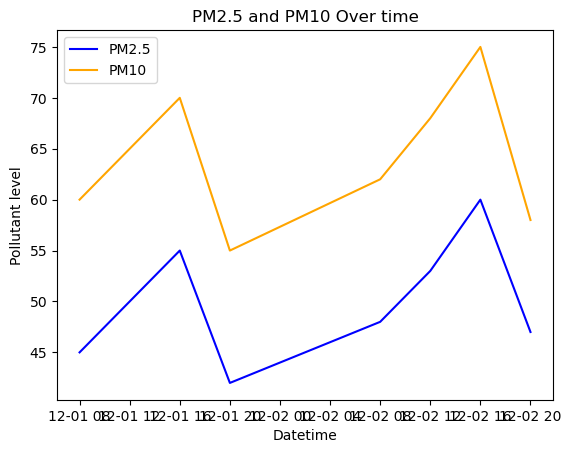

In [22]:
#Time Series plot for PM2.5 and PM10
plt.plot(data.index,data['PM2.5'],label='PM2.5',color='blue')
plt.plot(data.index,data['PM10'],label='PM10',color='orange')
plt.title("PM2.5 and PM10 Over time")
plt.xlabel("Datetime")
plt.ylabel("Pollutant level")
plt.legend()
plt.show()

In [23]:
# Seasonal analysis
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')[['PM2.5', 'PM10']].mean()

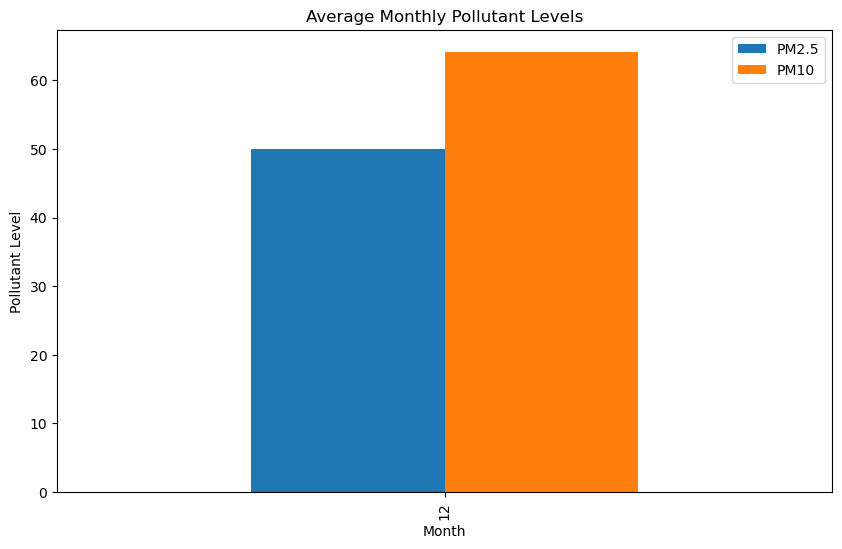

In [24]:
# Plot the data
monthly_avg.plot(kind='bar', figsize=(10, 6))
plt.title("Average Monthly Pollutant Levels")
plt.xlabel("Month")
plt.ylabel("Pollutant Level")
plt.show()